# Predicting whether a patient has heart disease or not using Machine Learning

This notebook looks into using various python based machine learning and data science in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

**The step by step approach will be:**
- Problem definition
- Data
- Evaluation
- Features
- Modelling
- Experimentation

## Problem definition

In a statement,
- Given clinical parameters about a patient, can we predict whether they have heart disease or not?

## Data

The original data came from the Cleveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of the data on kaggle.
https://archive.ics.uci.edu/ml/datasets/heart+disease

## Evaluation

- If we can reach a 95% accuracy on predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary** (data dictionary gives you details about the data you're working on)

#### Import tools needed for project

In [152]:
# tools for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# so that plots will appear inside notebook
%matplotlib inline

# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import recall_score, f1_score, plot_roc_curve

#### Load data

In [153]:
data = pd.read_csv('heart-disease.csv')
data.shape # (rows, columns)

(303, 14)

## EDA (exploratory data analysis)

Goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

**Things to take into account:**
1. what question(s) are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers (values or samples that are outlandish or far away from the others) and why should you care about them?
5. how can you add, change or remove features to get more out of your data?

In [154]:
# find out how many of each class of zero's and one's are in target column

data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

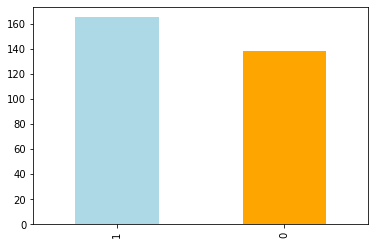

In [155]:
data['target'].value_counts().plot(kind = 'bar', color = ['lightblue', 'orange']);

In [228]:
# check info about dataframe

data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [157]:
# check for missing values in data

data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [158]:
# to find out more about datafram

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Comparing columns in dataframe in order to find patterns

### Heart disease frequency according to sex

In [159]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [160]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [161]:
# compare sex column with target column using pd.crosstab()

pd.crosstab(data['sex'], data['target'])

target,0,1
sex,,
0,24,72
1,114,93


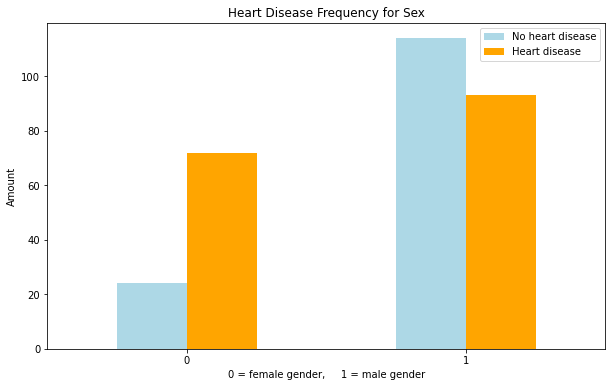

In [162]:
# create a crosstab plot of sex vs target

pd.crosstab(data.sex, data.target).plot(kind = 'bar', figsize = (10, 6), color = ['lightblue', 'orange']);
plt.title('Heart Disease Frequency for Sex');
plt.xlabel('0 = female gender,     1 = male gender');
plt.ylabel('Amount');
plt.legend(['No heart disease', 'Heart disease'])
plt.xticks(rotation = 1);

In [163]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs thalach (maximum heart rate achieved) for heart disease

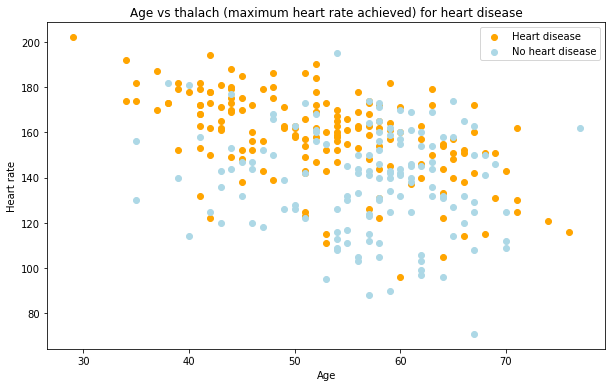

In [164]:
# create figure for Age vs thalach (maximum heart rate achieved) for heart disease
plt.figure(figsize = (10, 6));

# create scatter plot for target == 1
plt.scatter(data.age[data.target == 1], data.thalach[data.target == 1], c = 'orange');

# create scatter plot for target == 0
plt.scatter(data.age[data.target == 0], data.thalach[data.target == 0], c = 'lightblue');

plt.title('Heart Disease Frequency for Sex');
plt.xlabel('0 = female gender,     1 = male gender');
plt.ylabel('Amount');
plt.legend(['No heart disease', 'Heart disease'])
plt.xticks(rotation = 1);


plt.title('Age vs thalach (maximum heart rate achieved) for heart disease');
plt.xlabel('Age');
plt.ylabel('Heart rate');
plt.legend(['Heart disease', 'No heart disease']);

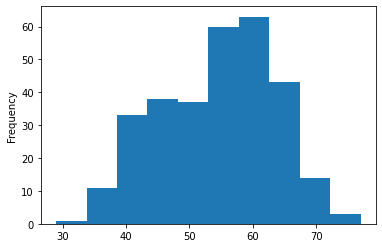

In [165]:
# check distribution of age column with histogram

data.age.plot.hist();

In [166]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Heart disease frequency with regards to cp (chest pain type)

In [167]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


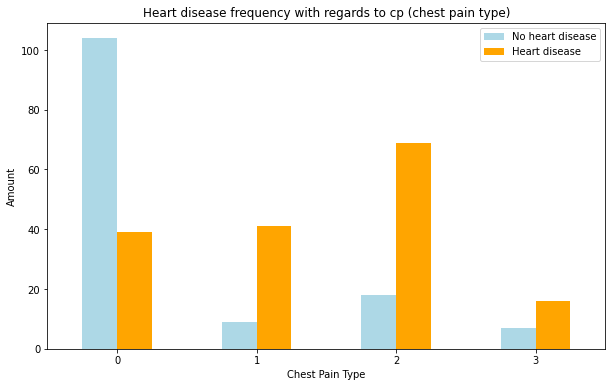

In [168]:
# create a crosstab plot of cp (chest pain type) vs target

pd.crosstab(data.cp, data.target).plot(kind = 'bar', figsize = (10, 6), color = ['lightblue', 'orange']);
plt.title('Heart disease frequency with regards to cp (chest pain type)');
plt.xlabel('Chest Pain Type');
plt.ylabel('Amount');
plt.legend(['No heart disease', 'Heart disease']);
plt.xticks(rotation = 1);

In [169]:
# Make a correlation matrix

data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


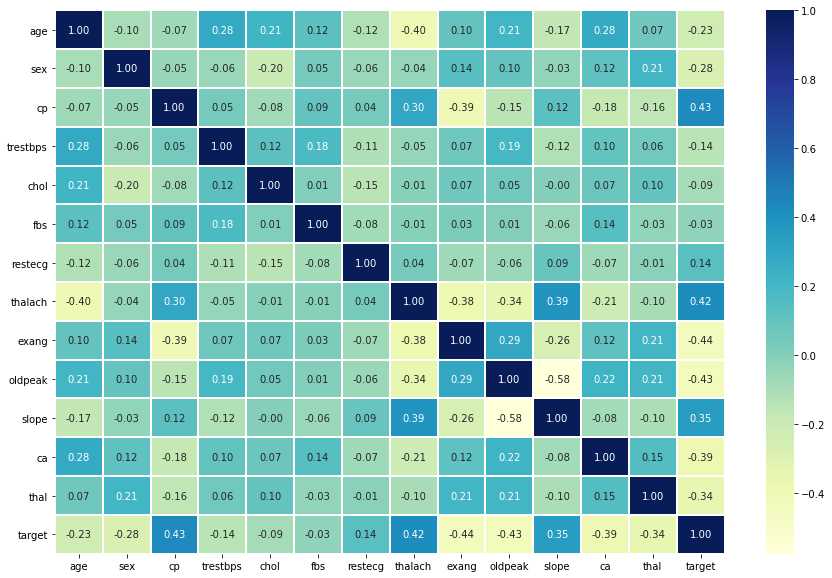

In [170]:
# make correlation matrix look better using seaborn heatmap

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths=1,
                 fmt = '.2f',
                 cmap = 'YlGnBu')

## Modelling

We are going to try three different classification models:
1. Logistics Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [171]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [172]:
X = data.drop('target', axis = 1)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [212]:
# putting all three models in a diction in order to create a function to run and score all three models at once

models = {'Logistics Regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Random Forest' : RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and score different machine learning models in sklearn
    models: different sklearn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # set random seed
    np.random.seed(25)
    
    # create empty dictionry to keep scores of different models
    model_scores = {}
    
    # loop through model dictionary
    for name, model in models.items():
        
        # fit model to data
        model.fit(X_train, y_train)
        
        # evaluate the model and append scores in empty dictionary
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores;

In [213]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/davidbrainerd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistics Regression': 0.7704918032786885,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.819672131147541}

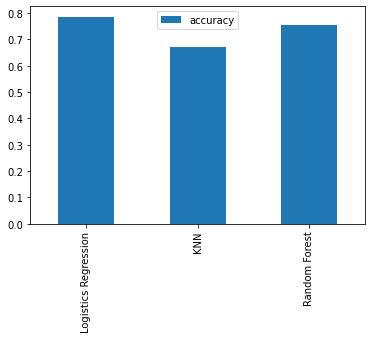

In [175]:
# comparing models using bar graph

model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot(kind = 'bar');

**Now that we have a baseline model, we have to evaluate and improve the model by doing some parameter tuning. The following are the things we have to do:**

    - hyperparameter tuning
    - feature importance
    - confusion matrix
    - cross-validation
    - precision
    - recall
    - F1 score
    - classification report
    - ROC curve 
    - Area under the curve (AUC)

## Hyperparameter Tuning

### Tuning hyperparameters for K-Nearest Neighbors Classifier by hand

In [176]:
train_scores = []
test_scores = []

# create list of different values for n-neighbors

neighbors = range(1, 21)

# set of K-Nearest Neighbors instance

knn = KNeighborsClassifier()

# loop through different n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the model
    knn.fit(X_train, y_train)
    
    # update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # update the testing score list
    test_scores.append(knn.score(X_test, y_test))

In [177]:
train_scores

[1.0,
 0.8181818181818182,
 0.7851239669421488,
 0.7644628099173554,
 0.7892561983471075,
 0.768595041322314,
 0.768595041322314,
 0.731404958677686,
 0.7520661157024794,
 0.7231404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.71900826446281,
 0.71900826446281,
 0.7066115702479339,
 0.7024793388429752,
 0.7272727272727273,
 0.7148760330578512,
 0.7148760330578512,
 0.6983471074380165]

In [178]:
test_scores

[0.5409836065573771,
 0.5081967213114754,
 0.6229508196721312,
 0.639344262295082,
 0.6721311475409836,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6065573770491803,
 0.639344262295082]

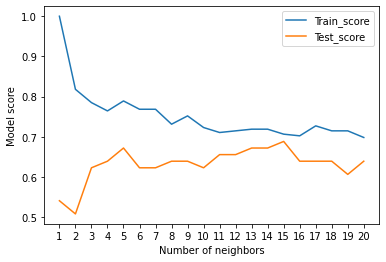

In [179]:
plt.plot(neighbors, train_scores, label = 'Train_score');
plt.plot(neighbors, test_scores, label = 'Test_score');
plt.xlabel('Number of neighbors');
plt.ylabel('Model score');
plt.xticks(np.arange(1, 21, 1))
plt.legend();

In [180]:
print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

Maximum KNN score on the test data: 68.85%


### Hyperparameter tuning with RandomizedSearchCV

In [181]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [214]:
# create a hyperparameter grid for LogisticsRregression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [215]:
# create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [216]:
# Tuning hyperparameters for LogisticsRegression

np.random.seed(25)

X = data.drop('target', axis = 1)
y = data['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandonForestClassifier
log_reg_model = LogisticRegression()

# set up RandomizedSearchCV
rscv_model1 = RandomizedSearchCV(estimator=log_reg_model, 
                              param_distributions=log_reg_grid,
                              n_iter=20, # number of rows to try
                              cv=5,
                              verbose=True)

# fit randomized version of model
rscv_model1.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [217]:
rscv_model1.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [218]:
rscv_model.score(X_test, y_test)

0.7704918032786885

In [219]:
# Tuning hyperparameters for RandomForestClassifier

np.random.seed(25)

X = data.drop('target', axis = 1)
y = data['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# set up RandomizedSearchCV
rscv_model2 = RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=rf_grid,
                                 n_iter=20, # number of rows to try
                                 cv=5,
                                 verbose=True)

# fit randomized version of model
rscv_model2.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [220]:
rscv_model2.best_params_

{'n_estimators': 160,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [221]:
rscv_model2.score(X_test, y_test)

0.7868852459016393

In [231]:
# Tuning LogisticRegression using GridSearchCV

log_reg_grid2 = {'C': [0.08858667904100823],
                'solver': ['liblinear']}

from sklearn.model_selection import GridSearchCV

np.random.seed(25)

X = data.drop('target', axis = 1)
y = data['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set up GridSearchCV
gscv_model2 = GridSearchCV(LogisticRegression(), 
                           param_grid=log_reg_grid2,
                           cv=5,
                           verbose=2)

# fit randomized version of model
gscv_model2.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.08858667904100823], 'solver': ['liblinear']},
             verbose=2)

In [232]:
gscv_model2.score(X_train, y_train), gscv_model2.score(X_test, y_test)

(0.859504132231405, 0.7868852459016393)

In [222]:
# Tuning RandomForestClassifier model using GridSearchCV

rf_grid_2 = {'n_estimators': [160],
             'max_depth': [None],
             'min_samples_split': [12],
             'min_samples_leaf': [5]}

In [223]:
from sklearn.model_selection import GridSearchCV

np.random.seed(25)

X = data.drop('target', axis = 1)
y = data['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set up GridSearchCV
gscv_model1 = GridSearchCV(RandomForestClassifier(), 
                           param_grid=rf_grid_2,
                           cv=5,
                           verbose=2)

# fit randomized version of model
gscv_model1.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=160; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=160; total time=   0.2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [5],
                         'min_samples_split': [12], 'n_estimators': [160]},
             verbose=2)

In [227]:
gscv_model1.score(X_train, y_train)

0.9173553719008265

In [224]:
gscv_model1.score(X_test, y_test)

0.7868852459016393

### Trying the cross_validated Score method on the RandomForestClassifier and LogisticRegression

In [236]:
# Cross validated accuracy for RandomForestClassifier

from sklearn.model_selection import cross_val_score

np.random.seed(25)

X = data.drop('target', axis = 1)
y = data['target']

model_cv1 = RandomForestClassifier()

rf_cv_accuracy = cross_val_score(model_cv1, X, y)
rf_cv_accuracy

array([0.81967213, 0.86885246, 0.83606557, 0.81666667, 0.76666667])

In [245]:
# cross_validated accuracy for RandomForestClassifier

print(f'The cross_validated accuracy is: {np.mean(rf_cv_accuracy)*100:.2f}%')

The cross_validated accuracy is: 82.16%


In [246]:
# Cross validated accuracy for LogisticRegression

from sklearn.model_selection import cross_val_score

np.random.seed(25)

X = data.drop('target', axis = 1)
y = data['target']

model_cv2 = LogisticRegression(max_iter=1000)

lr_cv_accuracy = cross_val_score(model_cv2, X, y)
lr_cv_accuracy

array([0.80327869, 0.86885246, 0.85245902, 0.86666667, 0.75      ])

In [247]:
# cross_validated accuracy for Logistic Regression

print(f'The cross_validated accuracy is: {np.mean(lr_cv_accuracy)*100:.2f}%')

The cross_validated accuracy is: 82.83%


### We have decided to proceed with the GridSearchCV for the RandomForestClassifier for further evaluation, because we think it is the best option so far.

## Evaluating machine learning classifier using different evaluation methods

### Doing the following:

- ROC Curve and AUC Score
- Confusion Maxtrix
- Classification Report
- Precision
- Recall
- F1 Score

**Using cross-validation where possible**

In [305]:
# make predictions with models 

y_preds = gscv_model1.predict(X_test)
y_preds, y_test

(array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1]),
 281    0
 81     1
 40     1
 175    0
 58     1
       ..
 285    0
 294    0
 133    1
 196    0
 75     1
 Name: target, Length: 61, dtype: int64)

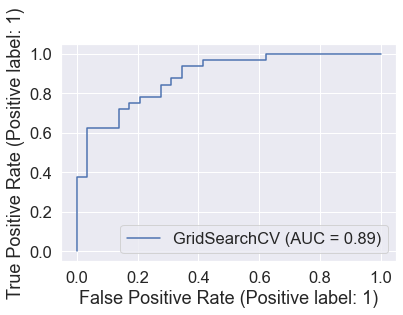

In [306]:
# ROC Curve : true positive rate vs false positive rate at various threshold settings

# plot roc curve and calculate AUC matric

plot_roc_curve(gscv_model1, X_test, y_test);

In [307]:
# create confusion matrix

print(confusion_matrix(y_test, y_preds))

[[21  8]
 [ 5 27]]


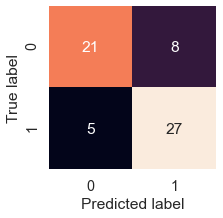

In [313]:
# create confusion matrix function



def plot_conf_matrix(y_true, y_pred):
    """
    Plot a nice looking confusion matrix using seaborn's heatmap
    """
    
    sns.set(font_scale = 1.3)


    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
plot_conf_matrix(y_test, y_preds)

### After plotting a ROC curve and calculating the AUC metric, and also creating a confusion matrix, lets create a classification report, as well as cross-validated precision, recall and f1 score.

In [314]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.77      0.84      0.81        32

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



### Calculate various evaluation metrics using cross-validation. 

#### We will calculate the following:

- Precision
- Recall
- F1 Score

In [315]:
gscv_model1.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 160}

In [335]:
# create new classifier with best hyperparameters for calculation of evaluation metrics

clf = RandomForestClassifier(max_depth = None,
                             min_samples_leaf = 5, 
                             min_samples_split = 12, 
                             n_estimators = 160)

In [364]:
# cross-validated accuracy

np.random.seed(25)

cv_accuracy = np.mean(cross_val_score(clf, X, y, scoring='accuracy'))
cv_accuracy

0.8414754098360657

In [345]:
print(f'The cross-validated accuracy score is: {np.mean(cv_accuracy)*100:.2f}%')

The cross-validated accuracy score is: 84.15%


In [363]:
# cross-validated precision

np.random.seed(25)

cv_precision = np.mean(cross_val_score(clf, X, y, scoring='precision'))
cv_precision

0.8338895173453997

In [346]:
print(f'The cross-validated precision score is: {np.mean(cv_precision)*100:.2f}%')

The cross-validated precision score is: 83.39%


In [361]:
# cross-validated recall

np.random.seed(25)

cv_recall = np.mean(cross_val_score(clf, X, y, scoring='recall'))
cv_recall

0.8909090909090909

In [349]:
print(f'The cross-validated recall score is: {np.mean(cv_recall)*100:.2f}%')

The cross-validated recall score is: 89.09%


In [362]:
# cross-validated f1 score

np.random.seed(25)

cv_f1 = np.mean(cross_val_score(clf, X, y, scoring='f1'))
cv_f1

0.8605330648873804

In [351]:
print(f'The cross-validated f1 score is: {np.mean(cv_f1)*100:.2f}%')

The cross-validated f1 score is: 86.05%


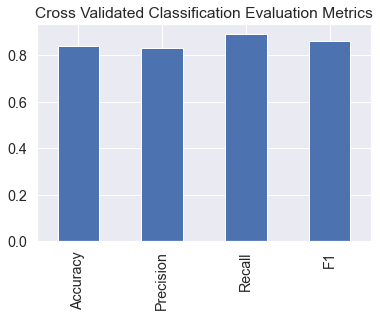

In [367]:
# Plot cross-validated metrics on a graph for visualization

cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                          index = [0])

cv_metrics.T.plot.bar(title = 'Cross Validated Classification Evaluation Metrics',
                      legend = False);

### Feature Importance

feature importance tells you which features in a dataset contributed most to predicting the outcome of the target variables, and how these features made their various contributions

In [368]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [391]:
# fit an instance of the model to the data

np.random.seed(25)
forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, y_train);
forest_classifier.score(X_test, y_test)

0.819672131147541

In [392]:
importances = forest_classifier.feature_importances_

In [393]:
sorted_indices = np.argsort(importances)[::-1]
sorted_indices

array([ 2,  7, 11, 12,  9,  0,  4,  3,  8, 10,  1,  6,  5])

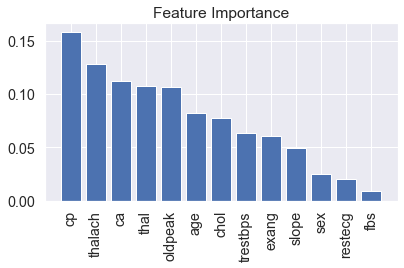

In [394]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [395]:
pd.crosstab(data.sex, data.target)

target,0,1
sex,,
0,24,72
1,114,93


In [396]:
pd.crosstab(data.slope, data.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment:

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

### Experimentation

If you haven't hit your evaluation metric or achieved your objective of getting your model to reach a particular prediction score, you can look into the following:
- Could you collect more data?
- Could you try another model like CatBoost or XGBoost?
- Could you improve the current models beyond its current performance?

If you have met your objective or achieved your evaluation metric, you can the proceed to export your model in order to be able to share with others.